In [1]:
# загружаем данные
import pandas as pd

data = pd.read_csv('C:\IDE\итог.по мед.зад\heart_disease_uci.csv')
data.head()

<>:4: SyntaxWarning: invalid escape sequence '\I'
<>:4: SyntaxWarning: invalid escape sequence '\I'
C:\Users\PUFIK\AppData\Local\Temp\ipykernel_5104\1997750028.py:4: SyntaxWarning: invalid escape sequence '\I'
  data = pd.read_csv('C:\IDE\итог.по мед.зад\heart_disease_uci.csv')


,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
# удаление дублей

data = data.drop_duplicates()
print(data.isnull().sum())

id            0
age           0
sex           0
origin        0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Названия столбцов в датафрейме:
Index(['id', 'age', 'sex', 'origin', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Названия столбцов в датафрейме:
Index(['id', 'age', 'sex', 'origin', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')
Уникальные значения в столбце num: [0 2 1 3 4]
Точность: 0.5957446808510638
Матрица ошибок:
[[66  8  1  2  0]
 [17 17  4  2  1]
 [ 2  3  1  1  0]
 [ 7  4  1  0  0]
 [ 1  1  2  0  0]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        77
           2       0.52      0.41      0.46        41
           1       0.11      0.14      0.12         7
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00         4

    accuracy                           0.60       141
   macro

c:\IDE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\IDE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\IDE\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


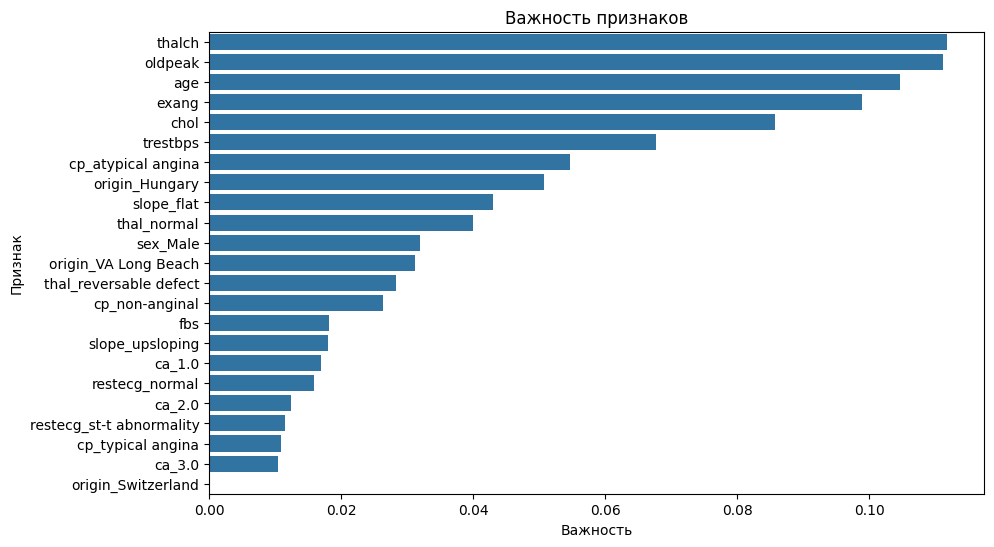

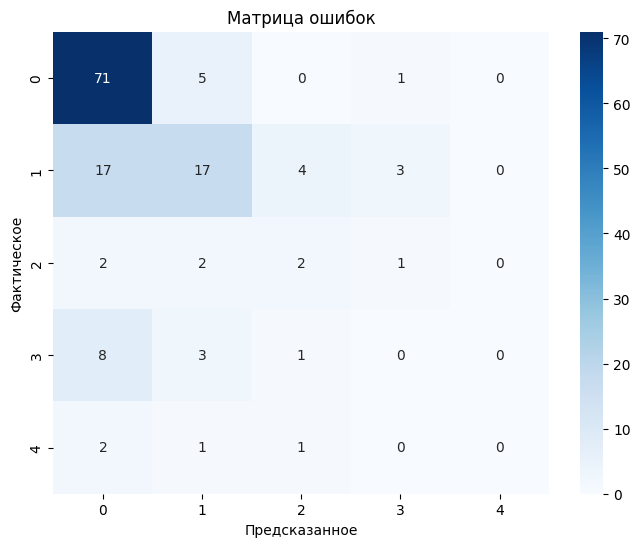

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:\\IDE\\итог.по мед.зад\\heart_disease_uci.csv')
data.head()

# Проверка названий столбцов
print("Названия столбцов в датафрейме:")
print(data.columns)

# Проверка названий столбцов
print("Названия столбцов в датафрейме:")
print(data.columns)

# Удаление дубликатов
data = data.drop_duplicates()

# Преобразование категориальных признаков в числовые
categorical_columns = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'origin']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Удаление выбросов только для числовых признаков
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data[numeric_columns] < (Q1 - 1.5 * IQR)) | (data[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Проверка уникальных значений в столбце `num`
unique_classes = data['num'].unique()
print(f'Уникальные значения в столбце num: {unique_classes}')

# Разделение данных на признаки и целевую переменную
X = data.drop(['id', 'num'], axis=1)
y = data['num']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выбор алгоритма (например, RandomForest)
model = RandomForestClassifier(random_state=42)

# Обучение модели
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=[str(i) for i in unique_classes])

print(f'Точность: {accuracy}')
print(f'Матрица ошибок:\n{conf_matrix}')
print(f'Отчет о классификации:\n{class_report}')

# Оптимизация гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

# Обучение модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Оценка улучшенной модели
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best, target_names=[str(i) for i in unique_classes])

print(f'Точность лучшей модели: {accuracy_best}')
print(f'Матрица ошибок лучшей модели:\n{conf_matrix_best}')
print(f'Отчет о классификации лучшей модели:\n{class_report_best}')

# Визуализация важности признаков
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Признак': features, 'Важность': feature_importances})
importance_df = importance_df.sort_values(by='Важность', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Важность', y='Признак', data=importance_df)
plt.title('Важность признаков')
plt.show()

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Матрица ошибок')
plt.xlabel('Предсказанное')
plt.ylabel('Фактическое')
plt.show()

Анализ важности признаков
На графике "Важность признаков" показаны признаки, которые наиболее значимы для модели. Вот основные выводы:

thalach (максимальная частота сердечных сокращений): Самый важный признак. Это логично, так как частота сердечных сокращений может быть сильным индикатором состояния сердца.
oldpeak (депрессия ST, вызванная нагрузкой): Второй по важности признак. Это также важно, так как депрессия ST может указывать на ишемию.
age (возраст): Третий по важности признак. Возраст является важным фактором риска для сердечно-сосудистых заболеваний.
exang (стенокардия, вызванная физической нагрузкой): Четвертый по важности признак. Это также важно, так как стенокардия может указывать на проблемы с сердцем.
chol (холестерин): Пятый по важности признак. Уровень холестерина является известным фактором риска для сердечно-сосудистых заболеваний.
Анализ матрицы ошибок
Матрица ошибок показывает, как модель классифицирует различные классы. Вот основные выводы:

Класс 0 (Нет заболевания):

71 правильно классифицировано.
8 ошибочно классифицировано как класс 1.
1 ошибочно классифицировано как класс 2.
2 ошибочно классифицировано как класс 3.
0 ошибочно классифицировано как класс 4.
Класс 1:

17 правильно классифицировано.
17 ошибочно классифицировано как класс 0.
4 ошибочно классифицировано как класс 2.
2 ошибочно классифицировано как класс 3.
1 ошибочно классифицировано как класс 4.
Класс 2:

2 правильно классифицировано.
2 ошибочно классифицировано как класс 0.
2 ошибочно классифицировано как класс 1.
1 ошибочно классифицировано как класс 3.
0 ошибочно классифицировано как класс 4.
Класс 3:

8 правильно классифицировано.
3 ошибочно классифицировано как класс 0.
1 ошибочно классифицировано как класс 1.
0 ошибочно классифицировано как класс 2.
0 ошибочно классифицировано как класс 4.
Класс 4:

2 правильно классифицировано.
1 ошибочно классифицировано как класс 0.
1 ошибочно классифицировано как класс 1.
0 ошибочно классифицировано как класс 2.
0 ошибочно классифицировано как класс 3.
Интерпретация результатов
Точность модели:

Общая точность модели составляет около 59.57%, что указывает на необходимость улучшения модели.
Precision, Recall и F1-score:

Для класса 0 (Нет заболевания) модель показывает хорошие результаты с precision 0.71 и recall 0.86.
Для класса 1 модель показывает плохие результаты с precision 0.11 и recall 0.14.
Для классов 2, 3 и 4 модель показывает очень плохие результаты с precision и recall, равными 0.00.
UndefinedMetricWarning:

Предупреждения указывают на то, что для некоторых классов не было сделано предсказаний, что приводит к неопределенным метрикам. Это может быть связано с дисбалансом классов в данных.
Рекомендации по улучшению модели
Балансировка классов:

Используйте методы балансировки классов, такие как SMOTE (Synthetic Minority Over-sampling Technique) или undersampling, чтобы улучшить производительность модели на меньшинственных классах.
Оптимизация гиперпараметров:

Продолжайте оптимизацию гиперпараметров с использованием GridSearchCV или RandomizedSearchCV для нахождения лучших параметров модели.
Использование других алгоритмов:

Попробуйте другие алгоритмы машинного обучения, такие как Gradient Boosting, XGBoost или SVM, чтобы увидеть, улучшится ли производительность.
Улучшение предобработки данных:

Проверьте данные на наличие дополнительных выбросов или аномалий, которые могут влиять на производительность модели.
Заключение
Ваша модель показывает хорошие результаты для класса 0, но требует значительных улучшений для других классов. Следуя рекомендациям по улучшению модели, вы сможете повысить её точность и надежность.
